In [14]:
!python3 -m pip install --user neo elephant viziphant

In [ ]:
import numpy as np
import quantities as pq
import neo
import elephant
import viziphant
np.random.seed(4542)

In [2]:
spiketrains = elephant.spike_train_generation.compound_poisson_process(
   rate=5*pq.Hz, A=[0]+[0.98]+[0]*8+[0.02], t_stop=10*pq.s)
len(spiketrains)

10

In [3]:
for i in range(90):
    spiketrains.append(elephant.spike_train_generation.homogeneous_poisson_process(
        rate=5*pq.Hz, t_stop=10*pq.s))

In [4]:
patterns = elephant.spade.spade(
    spiketrains=spiketrains, binsize=1*pq.ms, winlen=1, min_spikes=3,
    n_surr=100,dither=5*pq.ms,
    psr_param=[0,0,0],
    output_format='patterns')['patterns']

/usr/local/anaconda3/lib/python3.8/site-packages/elephant/spade.py:679: UserWarning: Optimized C implementation of FCA (fim.so/fim.pyd) not found in elephant/spade_src folder, or not compatible with this Python version. You are using the pure Python implementation of fast fca.
  warnings.warn(


Time for data mining: 10.718769073486328
Time for pvalue spectrum computation: 1158.289463043213


In [5]:
patterns

[{'itemset': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9),
  'windows_ids': (369, 8498, 4178, 1223, 9038),
  'neurons': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
  'lags': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]) * ms,
  'times': array([ 369., 1223., 4178., 8498., 9038.]) * ms,
  'signature': (10, 5),
  'pvalue': 0.0}]

<AxesSubplot:xlabel='Time (s)', ylabel='Neuron'>

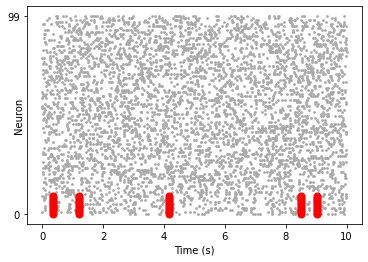

In [6]:
viziphant.patterns.plot_patterns(spiketrains, patterns)